# Download Crunchbase Datasets

*source: GitHub (notpeter/crunchbase-data)*

*release: 2015-08-27*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
from difflib import SequenceMatcher
import math

companies = pd.read_csv('https://raw.githubusercontent.com/notpeter/crunchbase-data/master/companies.csv')
investments = pd.read_csv('https://raw.githubusercontent.com/notpeter/crunchbase-data/master/investments.csv')
acquisitions = pd.read_csv('https://raw.githubusercontent.com/notpeter/crunchbase-data/master/acquisitions.csv')
rounds = pd.read_csv('https://raw.githubusercontent.com/notpeter/crunchbase-data/master/rounds.csv')
additions = pd.read_csv('https://raw.githubusercontent.com/notpeter/crunchbase-data/master/additions.csv')

https://www.kaggle.com/kbrookshier/crunchbase-startup-investments

#Data Transformation

***Required New Variables***

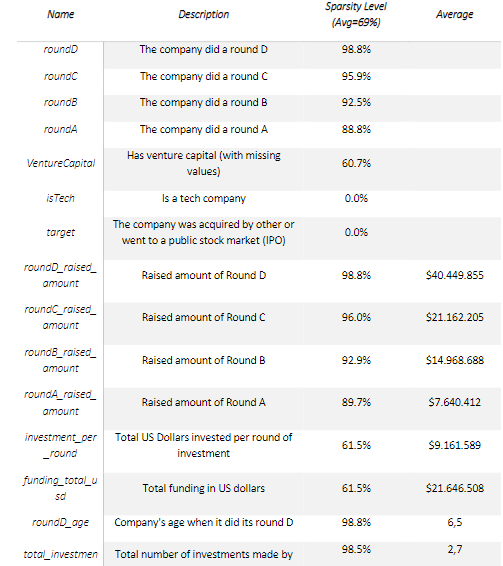
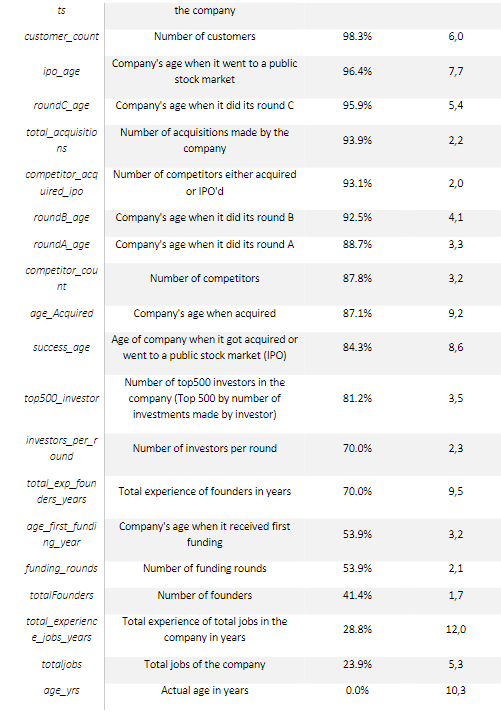
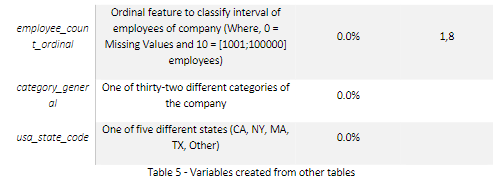

##Not-Age Variables

All except age variables - Total count: 21

In [ ]:
df = pd.DataFrame(data=companies[['permalink','name']].values, columns = ['permalink', 'name'])
df

,permalink,name
0,/organization/-fame,#fame
1,/organization/-qounter,:Qounter
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc."
3,/organization/0-6-com,0-6.com
4,/organization/004-technologies,004 Technologies
...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.
66365,/organization/Áeron,ÁERON
66366,/organization/Ôasys-2,Ôasys


In [ ]:
#roundD - 1 if company did a round-D else 0
df['roundD'] = np.zeros(df.shape[0])

#roundC - 1 if company did a round-C else 0
df['roundC'] = np.zeros(df.shape[0])

#roundB - 1 if company did a round-B else 0
df['roundB'] = np.zeros(df.shape[0])

#roundA - 1 if company did a round-A else 0
df['roundA'] = np.zeros(df.shape[0])

#VentureCapital = 1 if company has a venture else 0
df['VentureCapital'] = np.zeros(df.shape[0])

#IsTech = 1 if company is a Tech company else 0
df['IsTech'] = np.empty(df.shape[0])
df['IsTech'] = np.nan
tech_keys = ['tech','analytics', 'software', 'elec', 'web','manufacturing','internet','auto','smart','e-','data','develop','product','design','social media','games','system', 'network','platform','app', 'robot','bio','science']

#target = 1 if company went into acquisition (or IPO) else 0
df['target'] = np.zeros(df.shape[0])

#roundD_raised_amount = total amount raised by company in D rounds
df['roundD_raised_amount'] = np.empty(df.shape[0])
df['roundD_raised_amount'][:] = np.nan

#roundC_raised_amount = amount raised by company in C rounds
df['roundC_raised_amount'] = np.empty(df.shape[0])
df['roundC_raised_amount'][:] = np.nan

#roundB_raised_amount = total amount raised by company in B rounds
df['roundB_raised_amount'] = np.empty(df.shape[0])
df['roundB_raised_amount'][:] = np.nan

#roundA_raised_amount = total amount raised by company in A rounds
df['roundA_raised_amount'] = np.empty(df.shape[0])
df['roundA_raised_amount'][:] = np.nan

#total_investments = total no. of investments made to the company
df['total_investments'] = np.empty(df.shape[0])
df['total_investments'][:] = np.nan

#investment_per_round = average fund raised per round 
df['investment_per_round'] = np.empty(df.shape[0])
df['investment_per_round'][:] = np.nan

#funding_total_usd = total amound raised by company in all rounds
df['funding_total_usd'] = np.empty(df.shape[0])
df['funding_total_usd'][:] = np.nan

#total_acquisitions = no. of times company went into acquisition (or IPO)
df['total_acquisitions'] = np.zeros(df.shape[0])

#competitors_count = no. of competitiors
df['competitors_count'] = np.empty(df.shape[0])
df['competitors_count'][:] = np.nan

#competitors_acquired = no. of competitors went into acquisition (or IPO)
df['competitors_acquired'] = np.empty(df.shape[0])
df['competitors_acquired'][:] = np.nan

#country_code = Country Code (if available)
df['country_code'] = np.empty(df.shape[0])
df['country_code'][:] = np.nan

#funding_rounds = No of funding rounds company went in
df['funding_rounds'] = np.empty(df.shape[0])
df['funding_rounds'][:] = np.nan

#investors_per_round = average no. of investors per round
df['investors_per_round'] = np.empty(df.shape[0])
df['investors_per_round'][:] = np.nan

#top500_investors = average no. of investors per round
df['top500_investors'] = np.empty(df.shape[0])
df['top500_investors'][:] = np.nan
top_investors = investments['investor_name'].value_counts()[:500].index.tolist()

for i in range(30800,31900):
  cp = df.loc[i,'permalink']
  print("Companies completed:", i, " ,out of", companies.shape[0])
  
  company_details = companies.loc[companies['permalink']==cp]
  investments_in_company = investments.loc[investments['company_permalink'] ==  cp] 
  company_acquisitions = acquisitions.loc[acquisitions['company_permalink'] == cp]

  #Company Details:
  
  company_cat = company_details.loc[i,'category_list']
  if (isinstance(company_cat,str)):
    ## isTech
    df.loc[i,'IsTech'] = 0
    for key in tech_keys:
      if key in company_cat.lower():
        df.loc[i,'IsTech'] = 1
        break
      
  
  ## funding_rounds
  df.loc[i,'funding_rounds'] = company_details.loc[i,'funding_rounds']

  try:
    ## investment_per_round
    df.loc[i,'investment_per_round'] = float(company_details.loc[i,'funding_total_usd'])/float(company_details.loc[i,'funding_rounds'])

    ## funding_total_usd
    df.loc[i,'funding_total_usd'] = company_details.loc[i,'funding_total_usd']
  except:
    df.loc[i,'investment_per_round'] = np.nan
    df.loc[i,'funding_total_usd'] = np.nan
  
  ## investor_per_round - will be replaced from data in Investments Details (if available)
  df.loc[i, 'investors_per_round'] = 2
  
  ## total_investments - will be replaced from data in Investments Details (if available)
  df.loc[i,'total_investments'] = float(company_details.loc[i,'funding_rounds'])*2

  ## country_code  
  df.loc[i,'country_code'] = company_details.loc[i,'country_code']


  #Investment Details:
  
  if investments_in_company.shape[0] != 0:

    if 'D' in investments_in_company['funding_round_code'].tolist():
      ## roundD
      df.loc[i,'roundD'] = 1
      amt_list = investments_in_company.loc[investments_in_company['funding_round_code']=='D']['raised_amount_usd']
      amt_list.dropna()
      ## roundD_raised_amound
      df.loc[i,'roundD_raised_amount'] = np.mean(amt_list)

    if 'C' in investments_in_company['funding_round_code'].tolist():
      ## roundC
      df.loc[i,'roundC'] = 1
      amt_list = investments_in_company.loc[investments_in_company['funding_round_code']=='C']['raised_amount_usd']
      amt_list.dropna()
      ## roundC_raised_amound
      df.loc[i,'roundC_raised_amount'] = np.mean(amt_list)
      
    if 'B' in investments_in_company['funding_round_code'].tolist():
      ## roundB
      df.loc[i,'roundB'] = 1
      amt_list = investments_in_company.loc[investments_in_company['funding_round_code']=='B']['raised_amount_usd']
      amt_list.dropna()
      ## roundB_raised_amound
      df.loc[i,'roundB_raised_amount'] = np.mean(amt_list)

    if 'A' in investments_in_company['funding_round_code'].tolist():
      ## roundA
      df.loc[i,'roundA'] = 1
      amt_list = investments_in_company.loc[investments_in_company['funding_round_code']=='A']['raised_amount_usd']
      amt_list.dropna()
      ## roundA_raised_amount
      df.loc[i,'roundA_raised_amount'] = np.mean(amt_list)

    ## VentureCapital
    if 'venture' in investments_in_company['funding_round_type'].tolist():
      df.loc[i,'VentureCapital'] = 1
    
    ## total_investments
    df.loc[i,'total_investments'] = investments_in_company.shape[0]

    ## investor_per_round
    df.loc[i, 'investors_per_round'] = investments_in_company.shape[0]/company_details.loc[i, 'funding_rounds']
    
    ## top500_investors
    df.loc[i,'top500_investors'] = 0
    for investor in investments_in_company['investor_name'].tolist():
        if investor in top_investors:
          df.loc[i,'top500_investors'] += 1
    
  #Acquisition Details:
  
  if company_acquisitions.shape[0] != 0:  
    ## target
    df.loc[i,'target'] = 1
    ## total_acquisitions
    df.loc[i,'total_acquisitions'] = company_acquisitions.shape[0]
  
  
  #Competition Details

  competitors = companies.loc[companies['permalink']!=cp]
  if (isinstance(company_cat,str)):
     df.loc[i,'competitors_count'] = 0
     df.loc[i,'competitors_acquired'] = 0
     for j in competitors.index:
      try:
        if SequenceMatcher(None,competitors.loc[j,'category_list'],company_cat).ratio()>0.7:
          ## competitors_count
          df.loc[i,'competitors_count'] += 1
          if competitors.loc[j,'permalink'] in acquisitions['company_permalink'].tolist():
            ## competitors_acquired
            df.loc[i,'competitors_acquired'] += 1
      except:
        continue

  df.to_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_7a.csv', index=False)
                  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to b

Companies completed: 30800  ,out of 66368
Companies completed: 30801  ,out of 66368
Companies completed: 30802  ,out of 66368
Companies completed: 30803  ,out of 66368
Companies completed: 30804  ,out of 66368
Companies completed: 30805  ,out of 66368
Companies completed: 30806  ,out of 66368
Companies completed: 30807  ,out of 66368
Companies completed: 30808  ,out of 66368
Companies completed: 30809  ,out of 66368
Companies completed: 30810  ,out of 66368
Companies completed: 30811  ,out of 66368
Companies completed: 30812  ,out of 66368
Companies completed: 30813  ,out of 66368
Companies completed: 30814  ,out of 66368
Companies completed: 30815  ,out of 66368
Companies completed: 30816  ,out of 66368
Companies completed: 30817  ,out of 66368
Companies completed: 30818  ,out of 66368
Companies completed: 30819  ,out of 66368
Companies completed: 30820  ,out of 66368
Companies completed: 30821  ,out of 66368
Companies completed: 30822  ,out of 66368
Companies completed: 30823  ,out o

##Age Variables

In [ ]:
class Date:
    def __init__(self, d, m, y):
        self.d = d
        self.m = m
        self.y = y
monthDays = [31, 28, 31, 30, 31, 30,
             31, 31, 30, 31, 30, 31]
def countLeapYears(d): 
    years = d.y

    if (d.m <= 2):
        years -= 1
    ans = int(years / 4)
    ans -= int(years / 100)
    ans += int(years / 400)
    return ans
def getDifference(dt1, dt2):
    n1 = dt1.y * 365 + dt1.d
    for i in range(0, dt1.m - 1):
        n1 += monthDays[i]
    n1 += countLeapYears(dt1)
 
    n2 = dt2.y * 365 + dt2.d
    for i in range(0, dt2.m - 1):
        n2 += monthDays[i]
    n2 += countLeapYears(dt2)

    return (n2 - n1)

In [ ]:
## roundX_age -  Company's age when it did its round X 
df_4 = pd.DataFrame(data=investments.values)
roundA_age = pd.DataFrame(columns = ['permalink', 'name', 'age'])
roundB_age = pd.DataFrame(columns = ['permalink', 'name', 'age'])
roundC_age = pd.DataFrame(columns = ['permalink', 'name', 'age'])
roundD_age = pd.DataFrame(columns = ['permalink', 'name', 'age'])
df_4 = df_4[[0,1,15,16]]
for i in range(df_4.shape[0]):
  if df_4.iloc[i][15]=='A':
    start = df_4.iloc[i][1]
    j,k = (df_3.applymap(lambda x: str(x).startswith(start))).values.nonzero()
    start_date = df_3.iloc[j[0]][11]
    end_date = df_4.iloc[i][16]
    if type(start_date) == float or type(end_date) == float:
      continue
    st_dt = [int(it) for it in start_date.replace('-', ' ').split(' ')] 
    ed_dt = [int(it) for it in end_date.replace('-', ' ').split(' ')] 
    roundA_age = roundD_age.append({'permalink' : df_4.iloc[i][0], 'name' : df_4.iloc[i][1], 'age' : getDifference(Date(st_dt[2],st_dt[1],st_dt[0]),Date(ed_dt[2],ed_dt[1],ed_dt[0]))},  
                ignore_index = True)
  if df_4.iloc[i][15]=='B':
    start = df_4.iloc[i][1]
    j,k = (df_3.applymap(lambda x: str(x).startswith(start))).values.nonzero()
    start_date = df_3.iloc[j[0]][11]
    end_date = df_4.iloc[i][16]
    if type(start_date) == float or type(end_date) == float:
      continue
    st_dt = [int(it) for it in start_date.replace('-', ' ').split(' ')] 
    ed_dt = [int(it) for it in end_date.replace('-', ' ').split(' ')] 
    roundB_age = roundD_age.append({'permalink' : df_4.iloc[i][0], 'name' : df_4.iloc[i][1], 'age' : getDifference(Date(st_dt[2],st_dt[1],st_dt[0]),Date(ed_dt[2],ed_dt[1],ed_dt[0]))},  
                ignore_index = True)
  if df_4.iloc[i][15]=='C':
    start = df_4.iloc[i][1]
    j,k = (df_3.applymap(lambda x: str(x).startswith(start))).values.nonzero()
    start_date = df_3.iloc[j[0]][11]
    end_date = df_4.iloc[i][16]
    if type(start_date) == float or type(end_date) == float:
      continue
    st_dt = [int(it) for it in start_date.replace('-', ' ').split(' ')] 
    ed_dt = [int(it) for it in end_date.replace('-', ' ').split(' ')] 
    roundC_age = roundD_age.append({'permalink' : df_4.iloc[i][0], 'name' : df_4.iloc[i][1], 'age' : getDifference(Date(st_dt[2],st_dt[1],st_dt[0]),Date(ed_dt[2],ed_dt[1],ed_dt[0]))},  
                ignore_index = True)
  if df_4.iloc[i][15]=='D':
    start = df_4.iloc[i][1]
    j,k = (df_3.applymap(lambda x: str(x).startswith(start))).values.nonzero()
    start_date = df_3.iloc[j[0]][11]
    end_date = df_4.iloc[i][16]
    if type(start_date) == float or type(end_date) == float:
      continue
    st_dt = [int(it) for it in start_date.replace('-', ' ').split(' ')] 
    ed_dt = [int(it) for it in end_date.replace('-', ' ').split(' ')] 
    roundD_age = roundD_age.append({'permalink' : df_4.iloc[i][0], 'name' : df_4.iloc[i][1], 'age' : getDifference(Date(st_dt[2],st_dt[1],st_dt[0]),Date(ed_dt[2],ed_dt[1],ed_dt[0]))},  
                ignore_index = True)


In [ ]:
## age_yrs
df_4 = pd.DataFrame(data=companies.values)
actual_age = pd.DataFrame(columns = ['permalink', 'name', 'age'])

df_4 = df_4[[0,1,5,11]]
for i in range(df_4.shape[0]):
  if df_4.iloc[i][5]=='operating':
    start_date = df_4.iloc[i][11]
    end_date = "2020-12-16"
    if type(start_date) == float or type(end_date) == float:
      continue
    start_date = str(start_date)
    st_dt = [int(it) for it in start_date.replace('-', ' ').split(' ')] 
    ed_dt = [int(it) for it in end_date.replace('-', ' ').split(' ')] 
    actual_age = actual_age.append({'permalink' : df_4.iloc[i][0], 'name' : df_4.iloc[i][1], 'age' : getDifference(Date(st_dt[2],st_dt[1],st_dt[0]),Date(ed_dt[2],ed_dt[1],ed_dt[0]))},  
                ignore_index = True)

#Data Cleaning

**Concat all rows for NotAge Variables**

*data transformation needed hours of processing thus data was split and distributed among team members to process parallely*

In [34]:
df1 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_1.csv')[0:4400]
df2 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_2.csv')[4400:8800]
df3 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_3.csv')[8800:13200]
df4 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_4.csv')[13200:17600]
df5 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_5.csv')[22000:26400]
df6 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_5 (1).csv')[17600:22000]
df7 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_6.csv')[26400:30800]
df8a = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_7a.csv')[30800:31900]
df8b = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_7b.csv')[31900:33000]
df8c = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_7c.csv')[33000:34100]
df8d = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_7d.csv')[34100:35200]             
df9 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_8.csv')[35200:39600]            
df10 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/NotAge21_66k_9.csv')[39600:44000]            
df11 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/final - 1c.csv')[44000:]                     

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [35]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8a,df8b,df8c,df8d,df9,df10,df11,])
df

,permalink,name,roundD,roundC,roundB,roundA,VentureCapital,IsTech,target,roundD_raised_amount,roundC_raised_amount,roundB_raised_amount,roundA_raised_amount,total_investments,investment_per_round,funding_total_usd,total_acquisitions,competitors_count,competitors_acquired,country_code,funding_rounds,investors_per_round,top500_investors
0,/organization/-fame,#fame,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,2.0,10000000.0,10000000.0,0.0,299.0,5.0,IND,1.0,2.00,NaN
1,/organization/-qounter,:Qounter,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,4.0,350000.0,700000.0,0.0,19.0,0.0,USA,2.0,2.00,NaN
2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,2.0,3406878.0,3406878.0,0.0,129.0,9.0,NaN,1.0,2.00,NaN
3,/organization/0-6-com,0-6.com,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,2000000.0,1.0,2000000.0,2000000.0,0.0,1211.0,186.0,CHN,1.0,1.00,0.0
4,/organization/004-technologies,004 Technologies,0.0,0.0,0.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,4109.0,563.0,USA,1.0,1.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN,NaN,NaN,1587301.0,1.0,1587301.0,1587301.0,0.0,1135.0,243.0,CHN,1.0,1.00,1.0
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,3.0,28576.0,114304.0,0.0,14.0,3.0,HRV,4.0,0.75,3.0
66365,/organization/Áeron,ÁERON,0.0,0.0,0.0,1.0,1.0,NaN,0.0,NaN,NaN,NaN,NaN,2.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,2.00,0.0
66366,/organization/Ôasys-2,Ôasys,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,1.0,18192.0,18192.0,0.0,20.0,0.0,USA,1.0,1.00,1.0


**Add Age Variable Columns (left join by company name & permalink)**

In [36]:
df_age1 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/actual_age.csv')
df_age2 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/success_age.csv')
df_age3 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/roundA_age.csv')
df_age4 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/roundB_age.csv')
df_age5 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/roundC_age.csv')
df_age6 = pd.read_csv('/content/drive/MyDrive/StartUp_Project/roundD_age.csv')

In [ ]:
print(df_age2['permalink'].unique().shape, df_age1['permalink'].shape) 

(1435,) (41414,)


In [10]:
df_age1.value_counts(subset=['name'])

name                      
吃神马 ChiShenMa                 1
Glownet                       1
Globial                       1
Globehook                     1
Globeecom International       1
                             ..
Rachel Joyce Organic Salon    1
RacerTimes                    1
Racemi                        1
Race Yourself                 1
#HASHOFF                      1
Length: 41414, dtype: int64

In [11]:
df_age1.loc[df_age1['name']=='500px']

,permalink,name,actual_age
264,/organization/500px,500px,4094


In [37]:
df = df.merge(df_age1, how='left', on = ['permalink','name'])
df = df.merge(df_age2, how='left', on = ['permalink','name'])
df = df.merge(df_age3, how='left', on = ['permalink','name'])
df = df.merge(df_age4, how='left', on = ['permalink','name'])
df = df.merge(df_age5, how='left', on = ['permalink','name'])
df = df.merge(df_age6, how='left', on = ['permalink','name'])

**Cleaning NaN Values**

In [38]:
df.isnull().sum()

permalink                   0
name                        1
roundD                      0
roundC                      0
roundB                      0
roundA                      0
VentureCapital              0
IsTech                   3148
target                      0
roundD_raised_amount    64772
roundC_raised_amount    62798
roundB_raised_amount    59626
roundA_raised_amount    56112
total_investments           0
investment_per_round    12785
funding_total_usd       12785
total_acquisitions          0
competitors_count        3148
competitors_acquired     3148
country_code             6958
funding_rounds              0
investors_per_round         0
top500_investors        21630
actual_age              24954
success_age             61971
roundA_age              57273
roundD_age              64933
dtype: int64

In [ ]:
#drop companies for which we dont have investments data
in_investments = list(investments['company_permalink'].unique())
for i in range(df.shape[0]):
  if df.loc[i,'permalink'] in in_investments:
    if df.loc[i, 'roundD'] == 0:
      df.loc[i,'roundD_raised_amount'] = 0
    if df.loc[i, 'roundC'] == 0:
      df.loc[i,'roundC_raised_amount'] = 0
    if df.loc[i, 'roundB'] == 0:
      df.loc[i,'roundB_raised_amount'] = 0
    if df.loc[i, 'roundA'] == 0:
      df.loc[i,'roundA_raised_amount'] = 0
  else:
    df = df.drop(index=i)
  print(i)


In [40]:
df.isnull().sum()

permalink                   0
name                        1
roundD                      0
roundC                      0
roundB                      0
roundA                      0
VentureCapital              0
IsTech                   2429
target                      0
roundD_raised_amount       90
roundC_raised_amount      187
roundB_raised_amount      469
roundA_raised_amount     1495
total_investments           0
investment_per_round     8537
funding_total_usd        8537
total_acquisitions          0
competitors_count        2429
competitors_acquired     2429
country_code             4990
funding_rounds              0
investors_per_round         0
top500_investors            0
actual_age              18637
success_age             40774
roundA_age              35643
roundD_age              43303
dtype: int64

In [76]:
# take inverse of ages as new variables so that we can replace nan values with zeros and scale up to preserve significant digits
df['success_age_inverse'] = 10000/df['success_age']
df['actual_age_inverse'] = 10000/df['actual_age']
df['roundD_age_inverse'] = 10000/df['roundD_age']
df['roundC_age_inverse'] = 10000/df['roundC_age']
df['roundB_age_inverse'] = 10000/df['roundB_age']
df['roundA_age_inverse'] = 10000/df['roundA_age']

#fill nan values with 0
df[['roundA_age_inverse','roundB_age_inverse','roundC_age_inverse','roundD_age_inverse','success_age_inverse']] = df[['roundA_age_inverse','roundB_age_inverse','roundC_age_inverse','roundD_age_inverse','success_age_inverse']].fillna(0)
#drop original age columns
df = df.drop(columns = ['roundA_age','roundB_age','roundC_age','roundD_age','success_age','actual_age']) 

In [55]:
## drop companies with no name
df = df.dropna(subset = ['name'])

In [ ]:
# redefine IsTech to remove nan values
tech_keys = ['tech','analytics', 'software', 'elec', 'web','manufacturing','internet','auto','smart','e-','data','develop','product','design','social media','games','system', 'network','platform','app', 'robot','bio','science']
for i in df.index:
  for key in tech_keys:
    if key in df.loc[i,'name']:
      df.loc[i,'IsTech'] = 1
    else:
      df.loc[i,'IsTech'] = 0
    if (isinstance(companies.loc[i,'category_list'],str)):
      if key in companies.loc[i,'category_list']:
        df.loc[i,'IsTech'] = 1
      else:
        df.loc[i,'IsTech'] = 0
  print(i)

In [83]:
df

,permalink,name,roundD,roundC,roundB,roundA,VentureCapital,target,roundD_raised_amount,roundC_raised_amount,roundB_raised_amount,roundA_raised_amount,total_investments,investment_per_round,funding_total_usd,total_acquisitions,competitors_count,competitors_acquired,country_code,funding_rounds,investors_per_round,top500_investors,IsTech,succes_age_inverse,actual_age_inverse,roundD_age_inverse,roundC_age_inverse,roundB_age_inverse,roundA_age_inverse,success_age_inverse
0,/organization/0-6-com,0-6.com,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2000000.0,1.0,2000000.0,2000000.0,0.0,1211.0,186.0,CHN,1.0,1.000000,0.0,0.0,NaN,0.000196,0.0,0.0,0.000000,22.573363,0.0
1,/organization/004-technologies,004 Technologies,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,4109.0,563.0,USA,1.0,1.000000,0.0,0.0,NaN,0.000250,0.0,0.0,0.000000,0.000000,0.0
2,/organization/01games-technology,01Games Technology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41250.0,41250.0,0.0,909.0,82.0,HKG,1.0,1.000000,1.0,0.0,NaN,NaN,0.0,0.0,0.000000,0.000000,0.0
3,/organization/0xdata,H2O.ai,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,20000000.0,8900000.0,14.0,8400000.0,33600000.0,0.0,341.0,51.0,USA,4.0,3.500000,4.0,0.0,NaN,0.000275,0.0,0.0,5.640158,7.722008,0.0
4,/organization/1,One Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,383350.0,1150050.0,0.0,1231.0,157.0,USA,3.0,4.333333,7.0,0.0,NaN,0.000292,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1587301.0,1.0,1587301.0,1587301.0,0.0,1135.0,243.0,CHN,1.0,1.000000,1.0,0.0,NaN,NaN,0.0,0.0,0.000000,0.000000,0.0
44733,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,28576.0,114304.0,0.0,14.0,3.0,HRV,4.0,0.750000,3.0,0.0,NaN,0.000319,0.0,0.0,0.000000,0.000000,0.0
44734,/organization/Áeron,ÁERON,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,0.0,NaN,NaN,NaN,1.0,2.000000,0.0,0.0,NaN,0.000275,0.0,0.0,0.000000,7.645260,0.0
44735,/organization/Ôasys-2,Ôasys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18192.0,18192.0,0.0,20.0,0.0,USA,1.0,1.000000,1.0,0.0,NaN,0.000394,0.0,0.0,0.000000,0.000000,0.0


In [84]:
#adding 2 extra variables

## status = current status of company (operational not operational)
## last_funding_at = year of last funding
for i in df.index:
  df.loc[i,'last_funding_at'] = int(companies.loc[i,'last_funding_at'][0:4])
  df.loc[i,'status'] = companies.loc[i,'status']

In [88]:
df.isnull().sum()

permalink                   0
name                        0
roundD                      0
roundC                      0
roundB                      0
roundA                      0
VentureCapital              0
target                      0
roundD_raised_amount       90
roundC_raised_amount      187
roundB_raised_amount      469
roundA_raised_amount     1495
total_investments           0
investment_per_round     8537
funding_total_usd        8537
total_acquisitions          0
competitors_count        2429
competitors_acquired     2429
country_code             4990
funding_rounds              0
investors_per_round         0
top500_investors            0
IsTech                      0
actual_age_inverse      18636
roundD_age_inverse          0
roundC_age_inverse          0
roundB_age_inverse          0
roundA_age_inverse          0
success_age_inverse         0
last_funding_at             0
status                      0
dtype: int64

In [89]:
## competitor = 0 if not found
df[['competitors_count','competitors_acquired']] = df[['competitors_count','competitors_acquired']].fillna(0) 

In [96]:
## take roundUp integer for investors_per_round
df['investors_per_round'] = df['investors_per_round'].apply(np.ceil)

In [106]:
df.to_csv('/content/drive/MyDrive/StartUp_Project/Stratup_AllVariables_raw.csv')
df

,permalink,name,roundD,roundC,roundB,roundA,VentureCapital,target,roundD_raised_amount,roundC_raised_amount,roundB_raised_amount,roundA_raised_amount,total_investments,investment_per_round,funding_total_usd,total_acquisitions,competitors_count,competitors_acquired,country_code,funding_rounds,investors_per_round,top500_investors,IsTech,actual_age_inverse,roundD_age_inverse,roundC_age_inverse,roundB_age_inverse,roundA_age_inverse,success_age_inverse,last_funding_at,status
0,/organization/0-6-com,0-6.com,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2000000.0,1.0,2000000.0,2000000.0,0.0,1211.0,186.0,CHN,1.0,1.0,0.0,0.0,1.961554,0.0,0.0,0.000000,22.573363,0.0,2015.0,operating
1,/organization/004-technologies,004 Technologies,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,0.0,4109.0,563.0,USA,1.0,1.0,0.0,0.0,2.498751,0.0,0.0,0.000000,0.000000,0.0,2014.0,operating
2,/organization/01games-technology,01Games Technology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41250.0,41250.0,0.0,909.0,82.0,HKG,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,2014.0,operating
3,/organization/0xdata,H2O.ai,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,20000000.0,8900000.0,14.0,8400000.0,33600000.0,0.0,341.0,51.0,USA,4.0,4.0,4.0,0.0,2.749519,0.0,0.0,5.640158,7.722008,0.0,2008.0,operating
4,/organization/1,One Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,383350.0,1150050.0,0.0,1231.0,157.0,USA,3.0,5.0,7.0,0.0,2.919708,0.0,0.0,0.000000,0.000000,0.0,2014.0,operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44732,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1587301.0,1.0,1587301.0,1587301.0,0.0,1135.0,243.0,CHN,1.0,1.0,1.0,0.0,NaN,0.0,0.0,0.000000,0.000000,0.0,2011.0,operating
44733,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,28576.0,114304.0,0.0,14.0,3.0,HRV,4.0,1.0,3.0,0.0,3.185728,0.0,0.0,0.000000,0.000000,0.0,2014.0,operating
44734,/organization/Áeron,ÁERON,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,NaN,0.0,0.0,0.0,NaN,1.0,2.0,0.0,0.0,2.749519,0.0,0.0,0.000000,7.645260,0.0,2007.0,closed
44735,/organization/Ôasys-2,Ôasys,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,18192.0,18192.0,0.0,20.0,0.0,USA,1.0,1.0,1.0,0.0,3.935458,0.0,0.0,0.000000,0.000000,0.0,2012.0,operating


In [120]:
df['actual_age_inverse'] = df['actual_age_inverse'].fillna(df['actual_age_inverse'].median())
df_clean = df.dropna()
df_clean

,permalink,name,roundD,roundC,roundB,roundA,VentureCapital,target,roundD_raised_amount,roundC_raised_amount,roundB_raised_amount,roundA_raised_amount,total_investments,investment_per_round,funding_total_usd,total_acquisitions,competitors_count,competitors_acquired,country_code,funding_rounds,investors_per_round,top500_investors,IsTech,actual_age_inverse,roundD_age_inverse,roundC_age_inverse,roundB_age_inverse,roundA_age_inverse,success_age_inverse,last_funding_at,status
0,/organization/0-6-com,0-6.com,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2000000.0,1.0,2.000000e+06,2000000.0,0.0,1211.0,186.0,CHN,1.0,1.0,0.0,0.0,1.961554,0.0,0.0,0.000000,22.573363,0.0,2015.0,operating
2,/organization/01games-technology,01Games Technology,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.125000e+04,41250.0,0.0,909.0,82.0,HKG,1.0,1.0,1.0,0.0,2.749519,0.0,0.0,0.000000,0.000000,0.0,2014.0,operating
3,/organization/0xdata,H2O.ai,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,20000000.0,8900000.0,14.0,8.400000e+06,33600000.0,0.0,341.0,51.0,USA,4.0,4.0,4.0,0.0,2.749519,0.0,0.0,5.640158,7.722008,0.0,2008.0,operating
4,/organization/1,One Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,3.833500e+05,1150050.0,0.0,1231.0,157.0,USA,3.0,5.0,7.0,0.0,2.919708,0.0,0.0,0.000000,0.000000,0.0,2014.0,operating
5,/organization/1-2-3-listo,"1,2,3 Listo",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.000000e+04,40000.0,0.0,1510.0,101.0,CHL,1.0,1.0,1.0,0.0,3.056235,0.0,0.0,0.000000,0.000000,0.0,2014.0,operating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44730,/organization/zytoprotec,Zytoprotec,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2686600.0,1.0,2.686600e+06,2686600.0,0.0,4082.0,300.0,AUT,1.0,1.0,0.0,0.0,1.961554,0.0,0.0,0.000000,4.504505,0.0,2009.0,operating
44731,/organization/zzish,Zzish,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,3.733333e+05,1120000.0,0.0,0.0,0.0,GBR,3.0,2.0,1.0,0.0,3.977725,0.0,0.0,0.000000,0.000000,0.0,2012.0,operating
44732,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1587301.0,1.0,1.587301e+06,1587301.0,0.0,1135.0,243.0,CHN,1.0,1.0,1.0,0.0,2.749519,0.0,0.0,0.000000,0.000000,0.0,2011.0,operating
44733,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,2.857600e+04,114304.0,0.0,14.0,3.0,HRV,4.0,1.0,3.0,0.0,3.185728,0.0,0.0,0.000000,0.000000,0.0,2014.0,operating


In [121]:
df_clean.isnull().sum()

permalink               0
name                    0
roundD                  0
roundC                  0
roundB                  0
roundA                  0
VentureCapital          0
target                  0
roundD_raised_amount    0
roundC_raised_amount    0
roundB_raised_amount    0
roundA_raised_amount    0
total_investments       0
investment_per_round    0
funding_total_usd       0
total_acquisitions      0
competitors_count       0
competitors_acquired    0
country_code            0
funding_rounds          0
investors_per_round     0
top500_investors        0
IsTech                  0
actual_age_inverse      0
roundD_age_inverse      0
roundC_age_inverse      0
roundB_age_inverse      0
roundA_age_inverse      0
success_age_inverse     0
last_funding_at         0
status                  0
dtype: int64

In [107]:
df_clean.to_csv('/content/drive/MyDrive/StartUp_Project/Stratup_AllVariables_cleaned.csv')

# Data Visualization

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [6]:
df= pd.read_csv('/content/drive/MyDrive/StartUp_Project/Stratup_AllVariables_cleaned.csv', index_col=0)
#df2= pd.read_csv('/content/drive/MyDrive/StartUp_Project/Stratup_AllVariables_raw.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32306 entries, 0 to 44735
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             32306 non-null  object 
 1   name                  32306 non-null  object 
 2   roundD                32306 non-null  float64
 3   roundC                32306 non-null  float64
 4   roundB                32306 non-null  float64
 5   roundA                32306 non-null  float64
 6   VentureCapital        32306 non-null  float64
 7   target                32306 non-null  float64
 8   roundD_raised_amount  32306 non-null  float64
 9   roundC_raised_amount  32306 non-null  float64
 10  roundB_raised_amount  32306 non-null  float64
 11  roundA_raised_amount  32306 non-null  float64
 12  total_investments     32306 non-null  float64
 13  investment_per_round  32306 non-null  float64
 14  funding_total_usd     32306 non-null  float64
 15  total_acquisitions 

In [17]:
#numerical columns
df_num= df.drop(['permalink', 'name', 'country_code', 'status'], axis = 1)
df_num = df_num.astype('int64')
df_num

,roundD,roundC,roundB,roundA,VentureCapital,target,roundD_raised_amount,roundC_raised_amount,roundB_raised_amount,roundA_raised_amount,total_investments,investment_per_round,funding_total_usd,total_acquisitions,competitors_count,competitors_acquired,funding_rounds,investors_per_round,top500_investors,IsTech,actual_age_inverse,roundD_age_inverse,roundC_age_inverse,roundB_age_inverse,roundA_age_inverse,success_age_inverse,last_funding_at
0,0,0,0,1,1,0,0,0,0,2000000,1,2000000,2000000,0,1211,186,1,1,0,0,1,0,0,0,22,0,2015
2,0,0,0,0,0,0,0,0,0,0,1,41250,41250,0,909,82,1,1,1,0,2,0,0,0,0,0,2014
3,0,0,1,1,1,0,0,0,20000000,8900000,14,8400000,33600000,0,341,51,4,4,4,0,2,0,0,5,7,0,2008
4,0,0,0,0,0,0,0,0,0,0,13,383350,1150050,0,1231,157,3,5,7,0,2,0,0,0,0,0,2014
5,0,0,0,0,0,0,0,0,0,0,1,40000,40000,0,1510,101,1,1,1,0,3,0,0,0,0,0,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44730,0,0,0,1,1,0,0,0,0,2686600,1,2686600,2686600,0,4082,300,1,1,0,0,1,0,0,0,4,0,2009
44731,0,0,0,0,0,0,0,0,0,0,4,373333,1120000,0,0,0,3,2,1,0,3,0,0,0,0,0,2012
44732,0,0,0,1,1,0,0,0,0,1587301,1,1587301,1587301,0,1135,243,1,1,1,0,2,0,0,0,0,0,2011
44733,0,0,0,0,0,0,0,0,0,0,3,28576,114304,0,14,3,4,1,3,0,3,0,0,0,0,0,2014


In [18]:
list(df_num.columns)

['roundD',
 'roundC',
 'roundB',
 'roundA',
 'VentureCapital',
 'target',
 'roundD_raised_amount',
 'roundC_raised_amount',
 'roundB_raised_amount',
 'roundA_raised_amount',
 'total_investments',
 'investment_per_round',
 'funding_total_usd',
 'total_acquisitions',
 'competitors_count',
 'competitors_acquired',
 'funding_rounds',
 'investors_per_round',
 'top500_investors',
 'IsTech',
 'actual_age_inverse',
 'roundD_age_inverse',
 'roundC_age_inverse',
 'roundB_age_inverse',
 'roundA_age_inverse',
 'success_age_inverse',
 'last_funding_at']

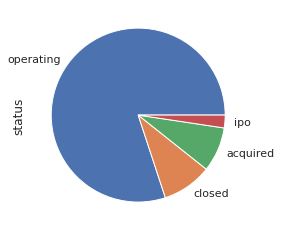

In [36]:
df['status'].value_counts()[:].plot(kind='pie')

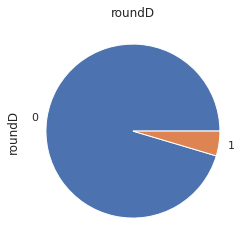

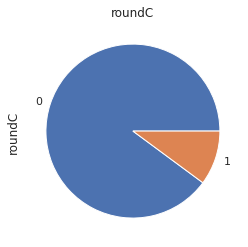

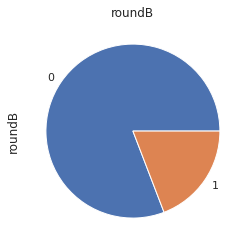

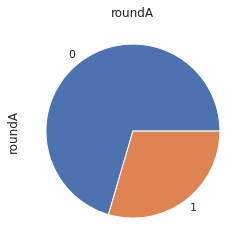

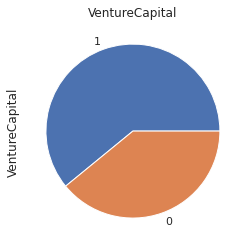

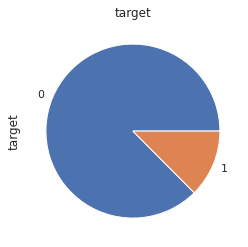

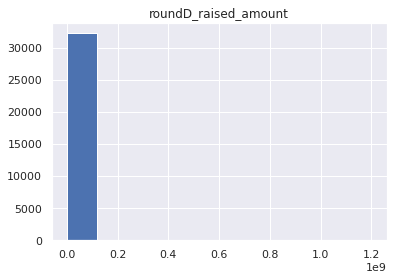

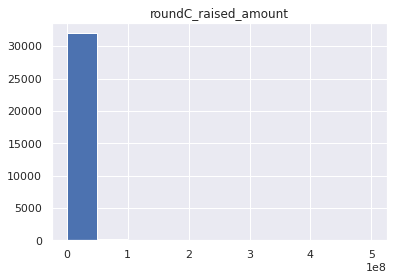

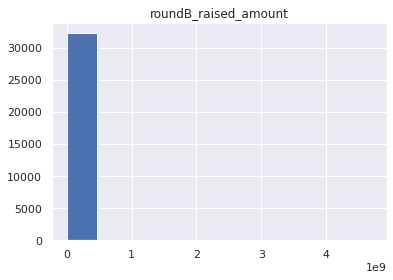

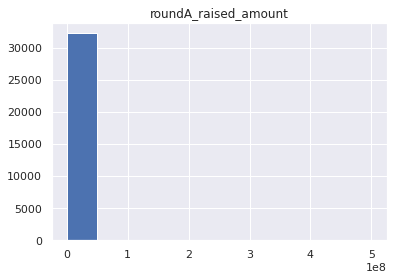

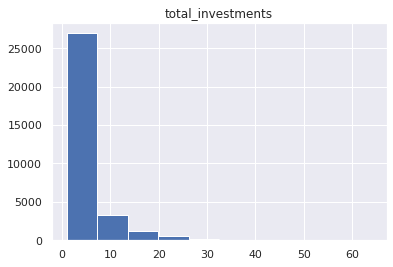

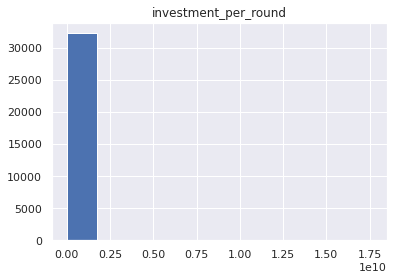

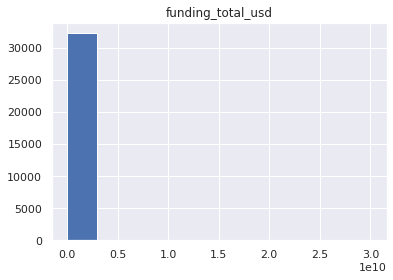

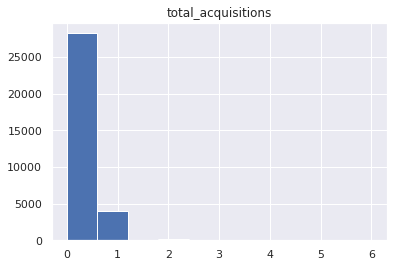

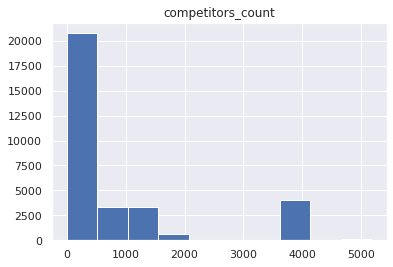

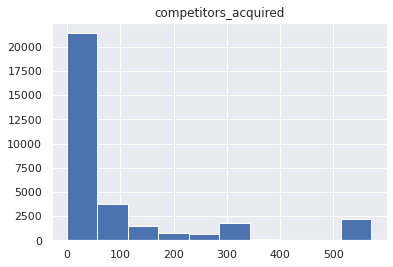

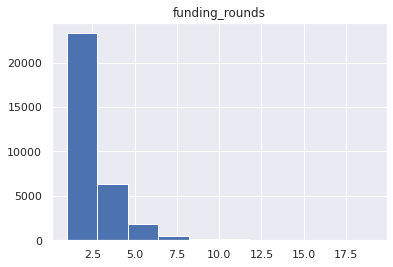

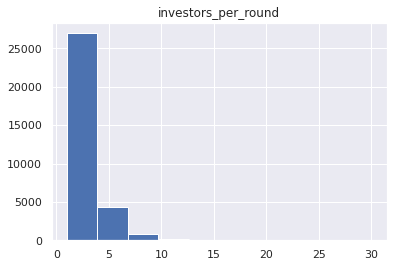

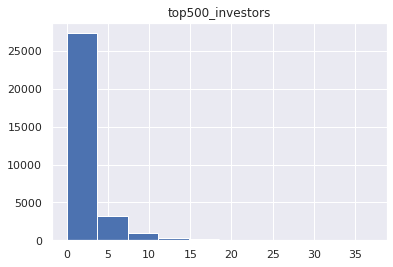

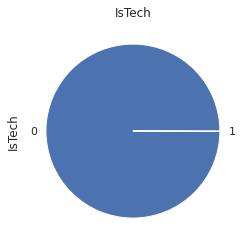

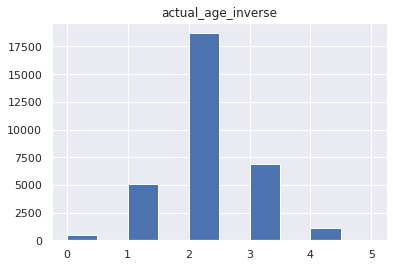

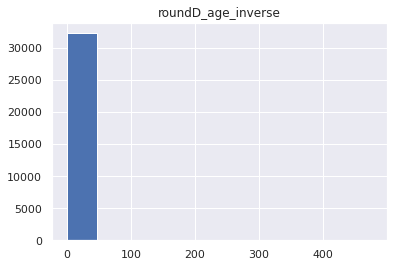

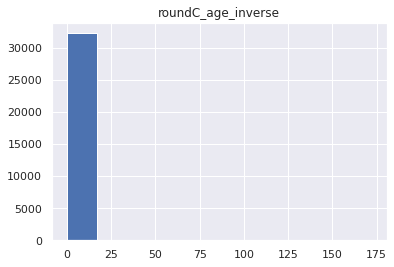

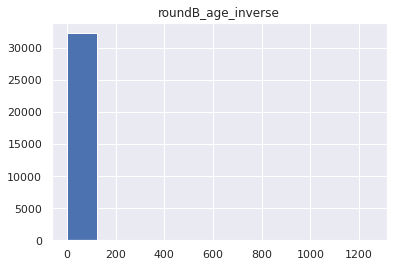

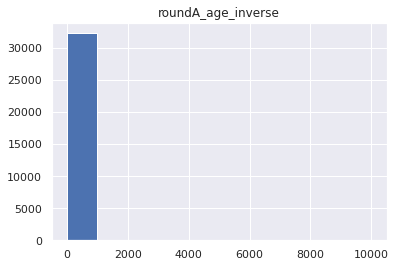

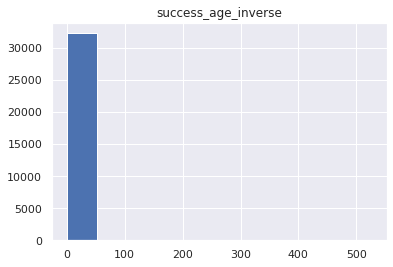

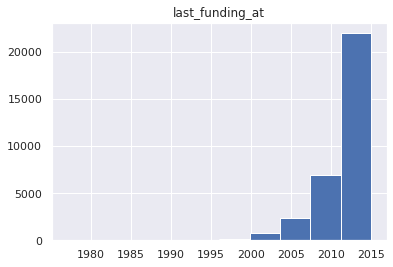

In [34]:
for i in df_num.columns:
  if (df_num[i].unique().shape[0]) <= 5:
    df_num[i].value_counts()[:].plot(kind='pie')
    plt.title(i)
    plt.show()
  else:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                        roundD    roundC  ...  success_age_inverse  last_funding_at
roundD                1.000000  0.401758  ...            -0.000102         0.002951
roundC                0.401758  1.000000  ...             0.014395         0.001184
roundB                0.200342  0.359153  ...             0.018651        -0.000024
roundA                0.047889  0.105287  ...             0.036630        -0.008181
VentureCapital        0.175929  0.268616  ...             0.015236        -0.004684
target                0.088053  0.135882  ...             0.370301        -0.000154
roundD_raised_amount  0.453083  0.214046  ...            -0.001222        -0.001342
roundC_raised_amount  0.237302  0.609607  ...             0.000108        -0.000293
roundB_raised_amount  0.034525  0.089407  ...             0.005318         0.001154
roundA_raised_amount  0.018394  0.049086  ...             0.006486        -0.007825
total_investments     0.389214  0.425100  ...             0.035646        -0

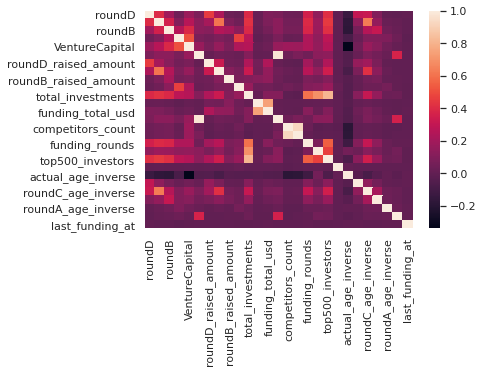

In [35]:
#correlation plot
print(df_num.corr())
sns.heatmap(df_num.corr())

# XG-Boost Classification

In [67]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot
import joblib

#XGB handles missing values very well, thus using raw data itself
df = pd.read_csv('/content/drive/MyDrive/StartUp_Project/Stratup_AllVariables_raw.csv', index_col=0)

X = df.drop(columns = ['success_age_inverse','total_acquisitions','target', 'name', 'permalink'])
Y = df.target

In [68]:
le = LabelEncoder()

#transform country_code
X['country_code']=X['country_code'].map(str)
le.fit(X['country_code'])
X['country_code'] = le.transform(X['country_code'])
joblib.dump(le, '/content/drive/MyDrive/StartUp_Project/country_code_label.joblib')

#transfor status
le.fit(X['status'])
X['status'] = le.transform(X['status'])
joblib.dump(le, '/content/drive/MyDrive/StartUp_Project/status_label.joblib')

['/content/drive/MyDrive/StartUp_Project/status_label.joblib']

In [69]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=7)
# fit model on training data
model = XGBClassifier(max_depth=70,n_estimators=150,learning_rate= 0.05)

eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(X_train, y_train,  early_stopping_rounds=15,eval_metric=["error", "logloss"], eval_set=eval_set, verbose=True)

[0]	validation_0-error:0.041381	validation_0-logloss:0.652063	validation_1-error:0.087506	validation_1-logloss:0.65491
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 15 rounds.
[1]	validation_0-error:0.039146	validation_0-logloss:0.614795	validation_1-error:0.084376	validation_1-logloss:0.620375
[2]	validation_0-error:0.037749	validation_0-logloss:0.581043	validation_1-error:0.081694	validation_1-logloss:0.588974
[3]	validation_0-error:0.036184	validation_0-logloss:0.549703	validation_1-error:0.08203	validation_1-logloss:0.560155
[4]	validation_0-error:0.034312	validation_0-logloss:0.52119	validation_1-error:0.0808	validation_1-logloss:0.533812
[5]	validation_0-error:0.033111	validation_0-logloss:0.494492	validation_1-error:0.079236	validation_1-logloss:0.509559
[6]	validation_0-error:0.031993	validation_0-logloss:0.470094	validation_1-error:0.077895	validation_1-logloss:0.487469


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=70,
              min_child_weight=1, missing=None, n_estimators=150, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [70]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))

Test Accuracy: 93.94%


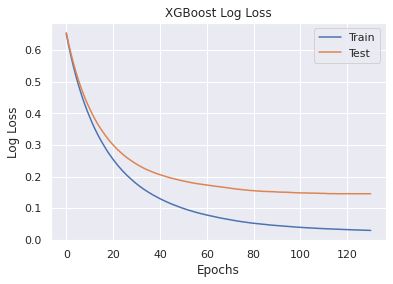

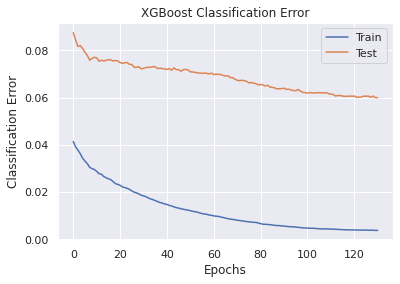

In [72]:
# retrieve performance metrics
results = model.evals_result()
epochs = len(results['validation_0']['error'])
x_axis = range(0, epochs)

# plot log loss
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Test')
ax.legend()
pyplot.ylabel('Log Loss')
pyplot.xlabel('Epochs')
pyplot.title('XGBoost Log Loss')
pyplot.show()

# plot classification error
fig, ax = pyplot.subplots()
ax.plot(x_axis, results['validation_0']['error'], label='Train')
ax.plot(x_axis, results['validation_1']['error'], label='Test')
ax.legend()
pyplot.ylabel('Classification Error')
pyplot.xlabel('Epochs')
pyplot.title('XGBoost Classification Error')
pyplot.show()

In [73]:
from tabulate import tabulate
cm = confusion_matrix(y_pred = predictions,y_true = y_test[:], labels=[0,1])
rows = np.array([["Actual Failures"], ["Actual Successfull"]])
rows = np.concatenate((rows,cm), axis=1)
headers = ["No. of Samples", "Predicted Failure", "Predicted Successfull"]
table = tabulate(rows,headers, tablefmt="grid")
print(table)

+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |                7702 |                     177 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                 365 |                     704 |
+--------------------+---------------------+-------------------------+


**Training Scores**

In [74]:
y_pred = model.predict(X_train)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))

Train Accuracy: 99.60%


In [75]:
from tabulate import tabulate
cm = confusion_matrix(y_pred = predictions,y_true = y_train[:], labels=[0,1])
rows = np.array([["Actual Failures"], ["Actual Successfull"]])
rows = np.concatenate((rows,cm), axis=1)
headers = ["No. of Samples", "Predicted Failure", "Predicted Successfull"]
table = tabulate(rows,headers, tablefmt="grid")
print(table)

+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               31701 |                      10 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                 134 |                    3944 |
+--------------------+---------------------+-------------------------+


In [43]:
model.save_model('/content/drive/MyDrive/StartUp_Project/xgb_model.json')

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

df = pd.read_csv('/content/drive/MyDrive/StartUp_Project/Stratup_AllVariables_cleaned.csv', index_col=0)
X = df.drop(columns = ['success_age_inverse','total_acquisitions','target', 'name', 'permalink'])
Y = df.target

In [45]:
le = joblib.load('/content/drive/MyDrive/StartUp_Project/country_code_label.joblib')
X['country_code'] = X['country_code'].map(str)
X['country_code'] = le.transform(X['country_code'])

le = joblib.load('/content/drive/MyDrive/StartUp_Project/status_label.joblib')
X['status'] = le.transform(X['status'])

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=13)

# define class weights
w = {0:1, 1:1}
# define model
lgr = LogisticRegression(random_state=13, class_weight=w)
# fit it
lgr.fit(X_train,y_train)
# test
y_pred = lgr.predict(X_test)
# performance
print(f'Test Accuracy Score: {accuracy_score(y_test,y_pred)}')

Test Accuracy Score: 0.8687712782420304


In [48]:
cm = confusion_matrix(y_pred = y_pred,y_true = y_test[:], labels=[0,1])
rows = np.array([["Actual Failures"], ["Actual Successfull"]])
rows = np.concatenate((rows,cm), axis=1)
headers = ["No. of Samples", "Predicted Failure", "Predicted Successfull"]
table = tabulate(rows,headers, tablefmt="grid")
print(table)

+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |                5613 |                       9 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                 839 |                       1 |
+--------------------+---------------------+-------------------------+


**Training Scores**

In [49]:
y_pred = lgr.predict(X_train)
# performance
print(f'Train Accuracy Score: {accuracy_score(y_train,y_pred)}')

Train Accuracy Score: 0.8750967342516638


In [63]:
cm = confusion_matrix(y_pred = y_pred,y_true = y_train[:], labels=[0,1])
rows = np.array([["Actual Failures"], ["Actual Successfull"]])
rows = np.concatenate((rows,cm), axis=1)
headers = ["No. of Samples", "Predicted Failure", "Predicted Successfull"]
table = tabulate(rows,headers, tablefmt="grid")
print(table)

+--------------------+---------------------+-------------------------+
| No. of Samples     |   Predicted Failure |   Predicted Successfull |
+====================+=====================+=========================+
| Actual Failures    |               22614 |                      17 |
+--------------------+---------------------+-------------------------+
| Actual Successfull |                3211 |                       2 |
+--------------------+---------------------+-------------------------+


In [33]:
joblib.dump(lgr, '/content/drive/MyDrive/StartUp_Project/lgr_model.joblib')

['/content/drive/MyDrive/StartUp_Project/lgr_model.joblib']

#Data Imputation

To get good results with MLP we attempt to regain lost datapoint due to null values by imputing missing values.

Datawig is a package that does this job us. Based on deep learning techniques it imputes missing values of columns by using correlations & training NNs with other columns

https://github.com/awslabs/datawig

In [ ]:
pip install datawig

In [ ]:
import datawig
df_imputed = datawig.SimpleImputer.complete(df)

In [ ]:
df_imputed.to_csv('/content/drive/MyDrive/StartUp_Project/Stratup_AllVariables_cleaned.csv')

# MLP

In [6]:
# Binary Classification with Keras Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

# load dataset
df = pd.read_csv('/content/drive/MyDrive/StartUp_Project/Stratup_AllVariables_cleaned.csv', index_col=0)
dataset = df.values

X = df.drop(columns = ['success_age_inverse','total_acquisitions','target', 'name', 'permalink'])
Y = df.target

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)

In [ ]:
le = joblib.load('/content/drive/MyDrive/StartUp_Project/country_code_label.joblib')
X['country_code'] = X['country_code'].map(str)
X['country_code'] = le.transform(X['country_code'])

le = joblib.load('/content/drive/MyDrive/StartUp_Project/status_label.joblib')
X['status'] = le.transform(X['status'])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_Y, test_size=0.2, random_state=13)

## BaseLine Model with 2 Layers

In [233]:
# baseline model
def create_baseline():
	# create model
	model = Sequential()
	model.add(Dense(32, input_dim=26, activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [ ]:
# evaluate model with dataset
estimator = KerasClassifier(build_fn=create_baseline, epochs=100, batch_size=5, verbose=2)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
5815/5815 - 5s - loss: 117335.4766 - accuracy: 0.7792
Epoch 2/100
5815/5815 - 5s - loss: 113998.0391 - accuracy: 0.7857
Epoch 3/100
5815/5815 - 5s - loss: 90378.5781 - accuracy: 0.7939
Epoch 4/100
5815/5815 - 5s - loss: 76584.3047 - accuracy: 0.7821
Epoch 5/100
5815/5815 - 5s - loss: 78625.1797 - accuracy: 0.8052
Epoch 6/100
5815/5815 - 5s - loss: 38954.1133 - accuracy: 0.7813
Epoch 7/100
5815/5815 - 6s - loss: 48050.9492 - accuracy: 0.7918
Epoch 8/100
5815/5815 - 5s - loss: 56005.2500 - accuracy: 0.7938
Epoch 9/100
5815/5815 - 5s - loss: 32595.5352 - accuracy: 0.7853
Epoch 10/100
5815/5815 - 5s - loss: 30696.1680 - accuracy: 0.7852
Epoch 11/100
5815/5815 - 5s - loss: 17858.6797 - accuracy: 0.7923
Epoch 12/100
5815/5815 - 5s - loss: 26621.3477 - accuracy: 0.8005
Epoch 13/100
5815/5815 - 5s - loss: 18295.6133 - accuracy: 0.7837
Epoch 14/100
5815/5815 - 5s - loss: 19727.6289 - accuracy: 0.7932
Epoch 15/100
5815/5815 - 5s - loss: 11680.3838 - accuracy: 0.7805
Epoch 16/100
5815

## Deep Model with 4 Layers

In [13]:
def create_larger():
  # create model
  model = Sequential()
  model.add(Dense(32, input_dim=26, activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [15]:
# evaluate model with dataset
estimator = KerasClassifier(build_fn=create_larger, epochs=100, batch_size=5, verbose=2)
kfold = StratifiedKFold(n_splits=10, shuffle=True)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
#print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/100
4652/4652 - 5s - loss: 10819.9316 - accuracy: 0.7937
Epoch 2/100
4652/4652 - 5s - loss: 10.9075 - accuracy: 0.8752
Epoch 3/100
4652/4652 - 5s - loss: 0.3758 - accuracy: 0.8757
Epoch 4/100
4652/4652 - 5s - loss: 0.3755 - accuracy: 0.8757
Epoch 5/100
4652/4652 - 5s - loss: 0.3755 - accuracy: 0.8757
Epoch 6/100
4652/4652 - 5s - loss: 0.3756 - accuracy: 0.8757
Epoch 7/100
4652/4652 - 5s - loss: 0.3756 - accuracy: 0.8757
Epoch 8/100
4652/4652 - 5s - loss: 0.3755 - accuracy: 0.8757
Epoch 9/100
4652/4652 - 5s - loss: 0.3756 - accuracy: 0.8757
Epoch 10/100
4652/4652 - 5s - loss: 0.7596 - accuracy: 0.8757
Epoch 11/100
4652/4652 - 5s - loss: 2.3393 - accuracy: 0.8757
Epoch 12/100
4652/4652 - 5s - loss: 0.3756 - accuracy: 0.8757
Epoch 13/100
4652/4652 - 5s - loss: 0.3755 - accuracy: 0.8757
Epoch 14/100
4652/4652 - 5s - loss: 0.3756 - accuracy: 0.8757
Epoch 15/100
4652/4652 - 5s - loss: 0.3757 - accuracy: 0.8757
Epoch 16/100
4652/4652 - 5s - loss: 0.3757 - accuracy: 0.8757
Epoch 17/100

In [18]:
print("Deep MLP: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Deep MLP: 87.57% (0.02%)


## **Final Model:** We will be using *`XGBoost`* as our final model, as it performs substantially well compared to *`Logistic Regression`* & *`MLP`*